This kernel covers the investigations that are related to main research questions.

# 1. Variation Introduced due to Start Month Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")
data_path = pathlib.Path(r"Preprocessed Data")
from src.annual_calculations import *
from src.trade_simulations import *
from src.long_term_simulations import *

df = pd.read_csv(data_path / "SP500_whole.csv")
df_gold = pd.read_csv(data_path / "Gold_prices.csv")

## 1.1. Variation Display

In [2]:
display_df = compute_annual_returns_stocks_individually_display(df)
display_df.head(12)

100%|██████████| 73/73 [00:00<00:00, 105.02it/s]


,Month,(%)Adjusted_Real_Returns
Period,,
"(1950, 1951)",1,23.909041
"(1950, 1951)",2,25.935916
"(1950, 1951)",3,22.955203
"(1950, 1951)",4,21.114372
"(1950, 1951)",5,17.749239
"(1950, 1951)",6,14.030462
"(1950, 1951)",7,24.381948
"(1950, 1951)",8,22.555467
"(1950, 1951)",9,21.501445


## 1.2. Correlation Between Mean Prices and Monthly Mean Prices

### 1.2.1. Correlation for Stocks

In [3]:
individual_calculation = compute_annual_returns_stocks_individually(df)
direct_calculation = compute_annual_returns_stocks(df)

print(
    "The correlation between two results:",
    stats.pearsonr(
        individual_calculation["(%)Adjusted_Real_Returns"],
        direct_calculation["(%)Adjusted_Annual_Return_With_Dividends"],
    ),
)

100%|██████████| 73/73 [00:00<00:00, 1867.02it/s]

The correlation between two results: PearsonRResult(statistic=np.float64(0.9991626223122413), pvalue=np.float64(2.6239352554021174e-100))


### 1.2.2. Correlation for Gold

In [4]:
individual_calculation = compute_annual_returns_gold_individually(df_gold)
direct_calculation = compute_annual_returns_commodity(df_gold)

print(
    "The correlation between two results:",
    stats.pearsonr(
        individual_calculation["(%)Adjusted_Real_Returns"],
        direct_calculation["(%)Adjusted_Annual_Return"],
    ),
)

100%|██████████| 73/73 [00:00<00:00, 1795.98it/s]

The correlation between two results: PearsonRResult(statistic=np.float64(0.9984969154177239), pvalue=np.float64(2.7120776244286845e-91))


# 1. Checking the Requirements for Gold-SP500 Annual Return Comparison

In [5]:
annual_returns_stocks = compute_annual_returns_stocks(df)
annual_returns_gold = compute_annual_returns_commodity(df_gold)

100%|██████████| 73/73 [00:00<00:00, 1497.20it/s]


## 1.1. Are the distributions normal?

In [6]:
adjusted_gold_normality_results = stats.shapiro(
    annual_returns_gold["(%)Adjusted_Annual_Return"]
)
adjusted_SP_normality_results_nodivs = stats.shapiro(
    annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"]
)
adjusted_SP_normality_results = stats.shapiro(
    annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"]
)

normality_df = pd.DataFrame(
    data=[
        adjusted_gold_normality_results,
        adjusted_SP_normality_results_nodivs,
        adjusted_SP_normality_results,
    ],
    columns=["Test Statistic", "p-value"],
    index=["Gold", "SP w.o. Div", "SP Div"],
)
normality_df

,Test Statistic,p-value
Gold,0.885272,0.000007
SP w.o. Div,0.993161,0.964985
SP Div,0.989987,0.836616


# 2. Correlation Between SPY and Index Prices

In [7]:
fund_vs_index = pd.read_csv(data_path / "fund_vs_index.csv")
fund_vs_index["Ratio"] = fund_vs_index.Close_fund / fund_vs_index.Close_index
fund_vs_index["Ratio"].mean(), fund_vs_index["Ratio"].std()

(np.float64(0.10009135682276281), np.float64(0.00027883713416550096))

# 3. Does purchase price is impotant for twenty years of investment strategy?

In [8]:
buying_price_simulation_results_stocks = simulate_twenty_years_of_investment(
    df, sample_size=30
)
real_profit_deviation = pd.DataFrame(
    buying_price_simulation_results_stocks.groupby("Period")[
        "% Change with Dividend"
    ].std()
).sort_values(by="% Change with Dividend", ascending=False)
real_profit_deviation.head(10)

100%|██████████| 54/54 [00:19<00:00,  2.84it/s]


,% Change with Dividend
Period,
"(1980, 2000)",2.636778e-13
"(1981, 2001)",2.443788e-13
"(1979, 1999)",1.888236e-13
"(1978, 1998)",1.864483e-13
"(1984, 2004)",1.785107e-13
"(1950, 1970)",1.665639e-13
"(1952, 1972)",1.648831e-13
"(1977, 1997)",1.579811e-13
"(1985, 2005)",1.540533e-13


In [9]:
buying_price_simulation_results_gold = simulate_twenty_years_of_investment_gold(
    df_gold, sample_size=30
)
real_profit_deviation_gold = pd.DataFrame(
    buying_price_simulation_results_gold.groupby("Period")["% Change"].std()
).sort_values(by="% Change", ascending=False)
real_profit_deviation_gold.head(10)

100%|██████████| 54/54 [00:00<00:00, 74.41it/s]


,% Change
Period,
"(1972, 1992)",24.778443
"(1999, 2019)",22.651708
"(1973, 1993)",21.706939
"(2003, 2023)",17.057621
"(2001, 2021)",15.799387
"(1993, 2013)",15.075469
"(2002, 2022)",14.415588
"(1969, 1989)",13.911751
"(2000, 2020)",13.480368


# 4. Checking the Requirements for Gold-SP500 20 Year Return Comparison

In [10]:
result_stock = simulate_twenty_years_of_investment(df, sample_size=1)
result_gold = pd.DataFrame(
    buying_price_simulation_results_gold.groupby("Period")["% Change"].mean()
)

100%|██████████| 54/54 [00:00<00:00, 78.48it/s]


## 4.1. Are the distributions normal?

In [11]:
stats.shapiro(result_stock["% Change w.o. Dividend"])

ShapiroResult(statistic=np.float64(0.9077687023795902), pvalue=np.float64(0.0005306952390839027))

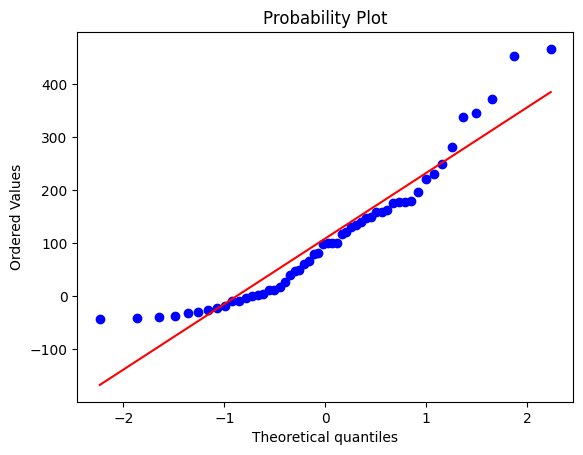

In [12]:
stats.probplot(result_stock["% Change w.o. Dividend"], plot=plt);

In [13]:
stats.shapiro(result_gold["% Change"])

ShapiroResult(statistic=np.float64(0.9449933957828709), pvalue=np.float64(0.015136842559208311))

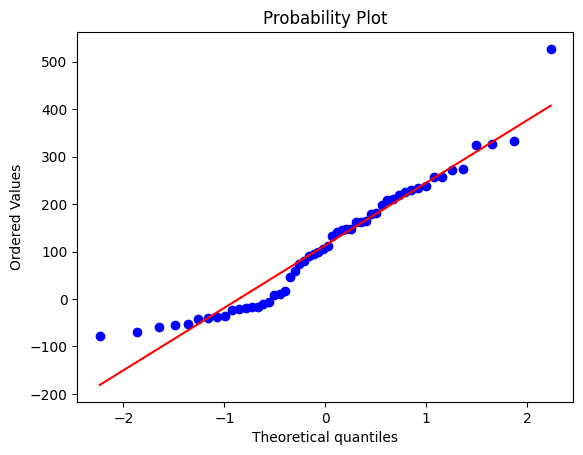

In [14]:
stats.probplot(result_gold["% Change"], plot=plt);

In [15]:
stats.shapiro(result_stock["% Change with Dividend"])

ShapiroResult(statistic=np.float64(0.8654451805182803), pvalue=np.float64(2.2247050331038574e-05))

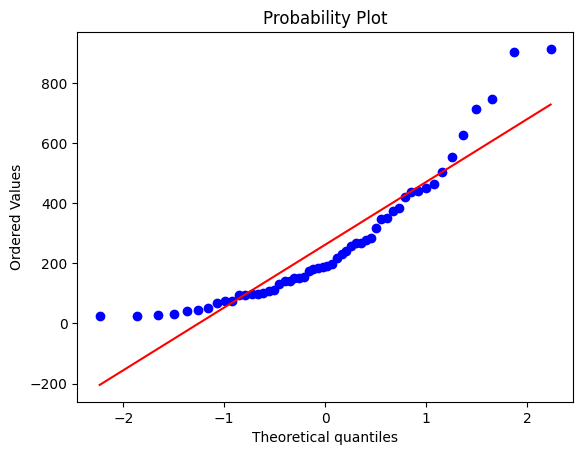

In [16]:
stats.probplot(result_stock["% Change with Dividend"], plot=plt);

# 5. Checking the Requirements of T-test for Trading vs Buy-Hold Comparison

In [17]:
trade_result = simulate_trade_EMA(df, verbose=False, EMA1=5, EMA2=8)
trade_result2 = simulate_trade_EMA(df, EMA1=3, EMA2=5)
control_result = simulate_control_group(df)

In [18]:
joinDF = pd.concat(
    [
        control_result["(%)Annual_Return_Without_Dividends"],
        trade_result["(%)Annual_Return_Without_Dividends"],
        trade_result2["(%)Annual_Return_Without_Dividends"],
    ],
    axis=1,
    join="inner",
)

In [19]:
stats.shapiro(control_result["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=np.float64(0.9727674227275949), pvalue=np.float64(0.11500278402993352))

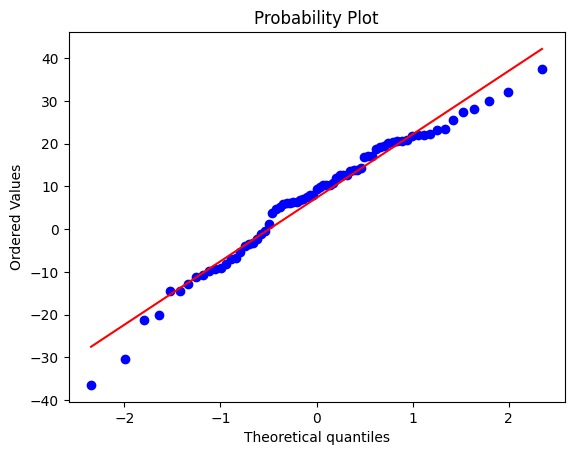

In [20]:
stats.probplot(control_result["(%)Annual_Return_Without_Dividends"], plot=plt);

In [21]:
stats.shapiro(trade_result["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=np.float64(0.989891809000332), pvalue=np.float64(0.8314713069560481))

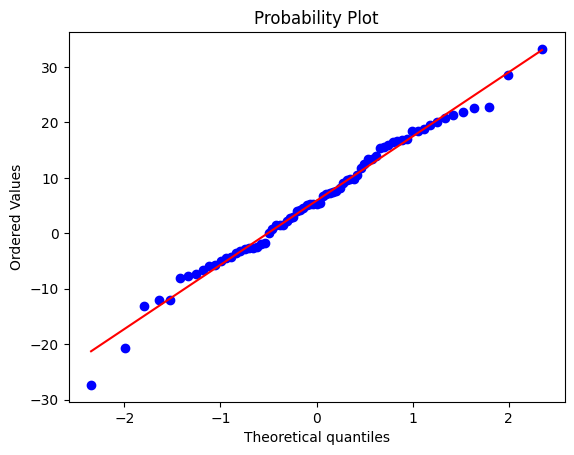

In [22]:
stats.probplot(trade_result["(%)Annual_Return_Without_Dividends"], plot=plt);

In [23]:
stats.shapiro(trade_result2["(%)Annual_Return_Without_Dividends"])

ShapiroResult(statistic=np.float64(0.9605086576999841), pvalue=np.float64(0.02218865696798713))

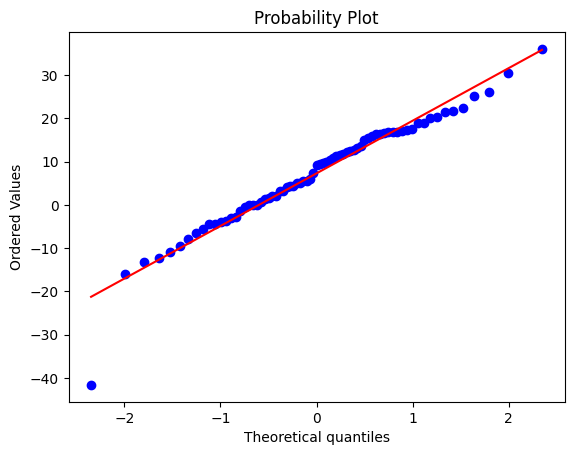

In [24]:
stats.probplot(trade_result2["(%)Annual_Return_Without_Dividends"], plot=plt);